<h1 style="text-align: center"> Timex & Tense Associations in Biblical Hebrew</h1>
<h3 style="text-align: center">Cody Kingham, MA Biblical Studies & Digital Humanities, VU Amsterdam</h3>
<div>
<img src="../logos/ETCBC.png" height="400" width="400">
<img src="../logos/VU_theology.png" height="400" width="400">
</div>

<hr>

## Hypothesis
Certain time expressions ("timexes") associate, positively and negatively, with certain tenses in Biblical Hebrew. 

## Motivation
The association of time expressions with certain tenses have the potential to inform us about the semantic content of the elusive Hebrew verbal form.

## Methodology
This notebook proceeds in two steps: data analysis and inferential analysis.

#### 1. Descriptive Analysis
This entails describing the data in the HB for **A)** time phrases (i.e. a timex) and **B)** tenses in Biblical Hebrew. This is done through simple counts and visualizations that help get a sense of the data. What kinds of timexes are there in the HB? What kinds of groups can be observed amongst them? How are they distributed in terms of genre and clauses? Likewise, what are the occurrence statistics for all predicative verbs in the HB? How are they distributed? 

#### 2. Inferential Analysis
The second step entails comparing the timexes with the tenses found in their enclosing clause to see if there are any statistically significant associations. For this step, the statistical method of χ^2 can be used. The analysis will consider additional complicating factors such as discourse structure, and the potentially complex interactions between timexes and other semantic entities (including the verb forms). 

## Theory
Theories on the semantic content of the Hebrew verb range from tense/aspect theories (e.g. Cook 2012, Joosten 2012) to discourse theories that stress the absence of inherent tense/aspect (Schneider YEAR; Talstra YEAR; Kalkman 2014
<br><span style="color: red">[bibliographical information needs to be corrected and checked, 22-10-17]</span>. 

This work proceeds from a theory neutral perspective. It adopts no position with regard to the debate over tense/aspect/discourse function, but it does seek to test those theories against the data. In order to test tense/aspect theories, this notebook seeks to see whether there are any associations between semantic carriers of time/aspect (time phrases) and verb tenses.

## Background
There has only been minimal research on the combination of verb tenses with time expressions in Biblical Hebrew. This is typically limited to select time phrases in studies on verbal tense (e.g. עתה, אז, עוד. cf. Joosten 2012; Cook 2012; Goldfaijn 1998; but see the helpful work of Van der Merwe 1997).

By comparison, there have been several pieces published on the association between tense and time phrases in English (Levickij and Romanova 1997; Harkness 1989). Those studies provide some helpful methodological reflection on the complexity of correlating time phrases to tenses. 

Comrie's 1985 study provides guidance on the complex interactions between the verb and the timex in language:
> Although collocation of tenses with time adverbials can be an important tool in investigating the meaning of tenses, it should again be emphasized that this tool cannot be applied mechanically, since the intervention of other factors may upset any simple association between tense and time adverbial.
<br>...<br>
> When one takes into account the interaction of tense with other facets of the syntax of a language...one can find a wide range of examples where there is apparent conflict between the time reference of a tense and a co-occurring adverbial. Thus in Portuguese...it is possible to have sentences like quando você chegar, eu já saí 'when you arrive, I will already have left' (Comrie 1985, 30, 31)

Comrie also provides some interesting examples in English of seeming "contradictions" between a supposed tense and a time adverbial, namely with the perfect tense. These kinds of complicating factors must be kept in mind.


## Limitations
This study cannot fully explore the problem of timex taxonomy, nor can it account for all of the potential discourse factors that certainly complicate certain associations. Additional problems for further exploration can only be described.

<hr>

In [1]:
# data import
timexes <- read.csv('../data/time_phrases.csv')
verbs <- read.csv('../data/verbs.csv')

<hr>

# 1. Data Description: Time Phrases

## 1.1. Data Discovery

This initial section focuses on exploring and describing the `timexes` dataset, which contains time phrase data at phrase and clause levels for every time phrase that only occurs once in a clause. Time phrases which occur alongside another time phrase in a single clause are thus excluded.

### How many different kinds of time phrases are there? 

Timexe surface forms are stored in the `phrase.trans` column.

In [103]:
tp.surfaces <- as.data.frame(table(timexes$phrase.trans))

colnames(tp.surfaces) <- c('surface','occurrence')

length(tp.surfaces$surface)

[1] 981

There are `981` surface forms represented in the sample.

### How are surface forms' occurrences distributed?

In [141]:
summary(tp.surface$occurrence) # summary of occurrence counts

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     1.0     1.0     3.9     2.0   342.0 

The summary data shows that there is wide margin between the mode of 342.0, and the mean of 3.9. **This data is therefore not distributed normally** (f. Levshina, 2015, 56).

Upon closer inspection, the distribution of surface forms follows **Zipf's law** for word frequencies, which is the observation that a word's frequency is inversely proportional to its rank in a corpus (Ibid., 62-63). The graph below illustrates this for time phrase surface form occurrences.

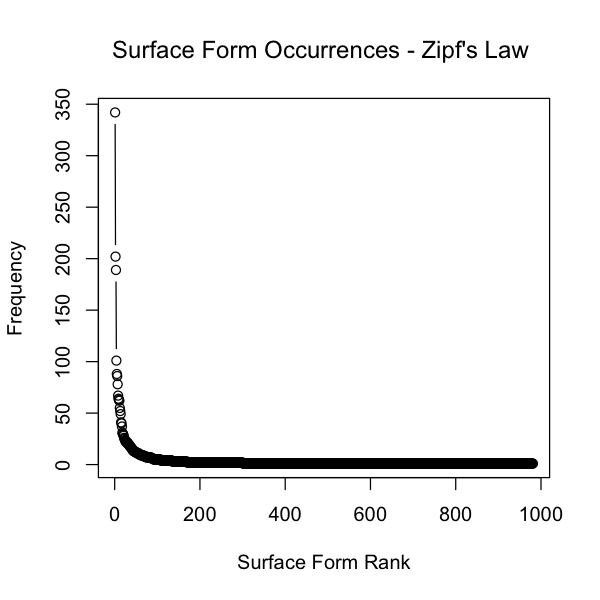

In [158]:
options(repr.plot.width=5, repr.plot.height=5) # adjust plot size

# plot time phrase surface form occurrences
plot(sort(tp.surface$occurrence, decreasing=T), # sort
     main="Surface Form Occurrences - Zipf's Law ",
     type='b', # add lines to plot
     ylab='Frequency',
     xlab='Surface Form Rank'
    )

As Zipf's law anticipates, the corpus contains a few (~50) surface forms which are strongly represented. Inversely, a lot of surface forms occur only once. The median occurrence is `1`, backed up by the Interquartile Range (`IQR`):

In [159]:
IQR(tp.surface$occurrence)

[1] 1

**Just how much of the sample's surface forms are *hapax legomena*?**

In [175]:
sum(tp.surface$occurrence == 1) / length(tp.surface$occurrence) # get proportion of hapax

[1] 0.6941896

So 69% (!) of time phrase surface forms occur only once.

### Surface Forms // Lexemes ?

It is insightful that time phrase surface forms are distributed like lexica in a corpus (Zipf). There is a lot of diversity reflected in the sample.

